# Exploratory Data Analysis Using Python 

## Introduction 

Hi, I'm Mely Santoso. Ini merupakan kernel untuk belajar EDA menggunakan Python 3 dengan Jupyter sebagai computational notebook-nya. Data dalam EDA ini didapatkan dari Kaushik Varma di Github ([Download CSV](https://raw.githubusercontent.com/Kaushik-Varma/Marketing_Data_Analysis/master/Marketing_Analysis.csv)). Rujukan dari EDA ini dari laman Towards Data Science di [Medium](https://towardsdatascience.com/exploratory-data-analysis-eda-python-87178e35b14).So, without further ado, mari kita markicab.  

## Data Cleaning 

Selalu. Langkah awal dalam analysis data adalah import dan membersihkan data dari "noise". Beberapa observasi mungkin bisa jadi tumpang tindih. Misalnya dari data yang kita gunakan. Jika data kita import secara manual, kita akan menemukan data tersebut memiliki nama variabel (atau columns name) yang tumpang tindih. Maka dari itu, kita harus set skiprows sama dengan dua karena rows heading dari data asli overlap. 

In [2]:
# import some useful library 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

#Read the data 
#you'll get more 'header' rows if you don't set the skiprows equal to 2 
# try this and see the difference - data = pd.read_("Marketing_Analysis.csv")
data = pd.read_csv("Marketing_Analysis.csv", skiprows=2)

data 

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45207,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45208,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45209,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


Oke data kita sudah lumayan, tapi belum sepenuhnya rapi dan bersih. Karena dalam hal ini kita tidak akan melakukan query dengan SQL, kita akan membuang variabel `costumerid` karena observasi ini tidak seberapa penting dalam EDA. Kita juga dapat melihat bahwa dalam observasi `jobedu` memiliki dua informasi yaitu `job` dan `education`. Kita akan memisahkan dua observasi ini lalu menghapus observasi `jobedu`. 

In [3]:
# remove costumerid because it has no use in this analysis 
data.drop('customerid', axis=1, inplace=True)

# extract job & education variable (observation) in new column from jobedu observation
data['job'] = data['jobedu'].apply(lambda x: x.split(",")[0])
data['education'] = data['jobedu'].apply(lambda x: x.split(",")[1])

data.drop('jobedu', axis=1, inplace=True)

#check the new data frame 
data 

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45207,71.0,55000,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
45208,72.0,55000,5715,married,yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired,secondary
45209,57.0,20000,668,married,yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,blue-collar,secondary


## Missing Values 

Salah satu seringkali harus diurus dari data adalah missing value atau nilai-nilai observasi yang tidak ada. Hal ini (missing value) sangat penting sebelum melakukan analisis atau visualiasi pada umumnya, karena akan sangat mempengaruhi angka statistik dalam summary juga. Baik mari kita lihat missing value dalam data kita. 

In [5]:
#Checking the missing value 
data.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

Dapat kita lihat bahwa tiga column (`age`, `month`, dan `response`) dalam data kita mengandung missing value. Ada beberapa cara untuk menangani missing value. Beberapa langkah yang dapat kita lakukan seperti membuang observasi yang mengandung missing value atau menggantinya dengan nilai lain 

### Membuang Missing Values 

Mari kita handle missing value observasi `age` dengan metode drop. Lalu kita lihat hasilnya 

In [4]:
#Dropping the records with age missing in data dataframe 
data = data[~data.age.isnull()].copy()

#Checking the missing values in the dataset.
data.isnull().sum()

age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

Selanjutnya, mari kita menambahkan nilai untuk column `month`. 

Karena kolom bulan adalah jenis objek, mari kita hitung mode kolom itu dan masukkan nilai-nilai itu ke nilai yang hilang.

In [5]:
# Find the mode of month in data 
month_mode = data.month.mode()[0]

# Fill the missing values with mode value of month in data. 
data.month.fillna(month_mode, inplace=True)

#Let's check the null values in the month column. 
data.month.isnull().sum()

0

Terakhir, kita akan menangani missing value di observasi `response`. Karena, target kolom kita adalah response, jika kita masukkan nilai pada kolom ini akan berdampak pada hasil analisis, kita akan drop missing values dalam observasi ini. 

In [6]:
# Drop the records with response missing in data 
data = data[~data.response.isnull()].copy()

#Calculate the missing values in each column of data frame 
data.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

Sekarang data kita telah terbebas dari missing values. Kita siap untuk melakukan analisis dan visualisasi lebih lanjut. 

## Univariate Analysis 

Univariate Analysis adalah bentuk analisis data yang paling sederhana. “Uni” artinya “satu”, dengan kata lain, analisis yang dilakukan akan fokus pada satu variabel saja. Analisi ini tidak berurusan dengan sebab atau hubungan dan tujuan utamanya adalah untuk menjelaskan; seringkali juga disebut sebagai analisis deskriptif.

### Nominal Data Analysis

Data nominal merupakan kumpulan dari kategori yang tidak memiliki arti matematis atau tingkatan. Seperti nomor punggung pemain sepak bola, misalnya. Dalam sepak bola, pemain dengan nomor punggung 1 bukan berarti ia yang paling bagus permainannya. Itu hanyalah sejenis kategori untuk mengidentifikasi identitas dari pemain. 

Dalam data set yang kita miliki, variabel `job` memiliki tipe data nominal. Dalam variabel ini, ada beberapa subkategori seperti technician, blue-collar, services, management, dan lain-lain. Analisis yang dilakukan pun hanyalah untuk mendeskripsikan; dari banyaknya sample yang kita miliki, mayoritas mereka bekerja apa? Mari kita analisis  

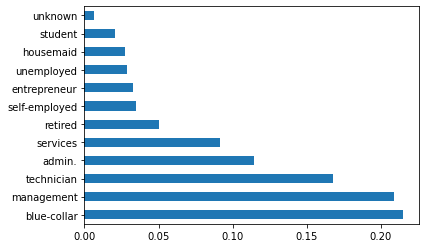

In [7]:
# Let's calculate the percentage of each job status category
data.job.value_counts(normalize=True)

#Plot the bar graph of percentage job category
data.job.value_counts(normalize=True).plot.barh()
plt.show()

Dari data di atas dapat kita lihat bahwa dataset kita banyak didominasi oleh sample yang bekerja sebagai blue-collar dibandingkan jenis pekerjaan lainnya.  

### Ordinal Data Analysis 

Secara umum, tipe data ordinal adalah jenis data kategori yang memiliki peringkat. Salah saatu contohnya adalah penggunaan angka untuk merujuk nama bulan; 1 berarti Januari, 2 berarti Februari, dan seterusnya. Angka 1 di sini merujuk pada bulan pertama dalam satu tahun. 

Beberapa contoh kategori ordinal dalam dataset ini adalah variabel `month` dan `education`. Mari kita analisis variabel `education` menggunakan Pie Chart untuk melihat bagaimana kategori pendidikan dalam data ini. 

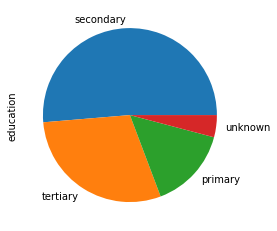

In [8]:
# Calculate the percentage of each education category. 
data.education.value_counts(normalize=True)

#Plot the pie chart of education categories 
data.education.value_counts(normalize=True).plot.pie()
plt.show()

Dengan analisis di atas, kita dapat menyimpulkan bahwa kumpulan data memiliki sejumlah besar data yang dimiliki oleh pendidikan menengah setelah pendidikan tinggi dan sekolah dasar berikutnya. Juga, sebagian kecil dari mereka tidak diketahui.

Ini adalah bagaimana kami menganalisis analisis kategorikal univariat. Jika kolom atau variabel berupa data numerik maka kita akan menganalisa dengan menghitung mean, median, std, dll. Kita bisa mendapatkan nilai tersebut dengan menggunakan fungsi describe. 

In [9]:
data.salary.describe()

count     45161.000000
mean      57004.849317
std       32087.698810
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

## Bivariate Analysis 

Analisis bivariat merupakan salah satu bentuk analisis kuantitatif (statistik) yang juga termasuk kategori sederhana. Analisis ini melibatkan dua variabel (often digambarkan sebagai X, Y), untuk tujuan menentukan hubungan empiris antar variables. Analisis bivariat dapat membantu dalam menguji hipotesis asosiasi sederhana.

Kita dapat memebuat analisis bivariat ini dengan tiga cara berbeda meliputi: 

* **Scatter Plot**
* **Pair Plot**
* **Correlation Matrix** 

Mari kita bahas satu persatu. 

### Scatter Plot 

Scatter Plot (juga disebut scatterplot, scatter graph, scatter chart, scattergram, atau scatter diagram) adalah jenis plot atau diagram matematis yang menggunakan koordinat Kartesius untuk menampilkan nilai biasanya dua variabel untuk satu set data. 

Dalam kasus ini, kita akan menggunakan observasi `balance`, `age`, dan `salary` dari dataset dan melihat apa yang dapat kita simpulkan dari plot yang dihasilkan. 

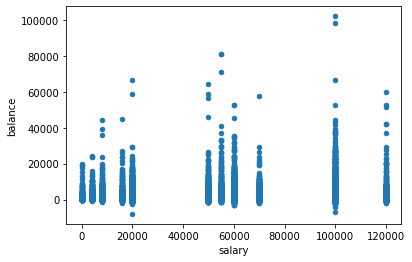

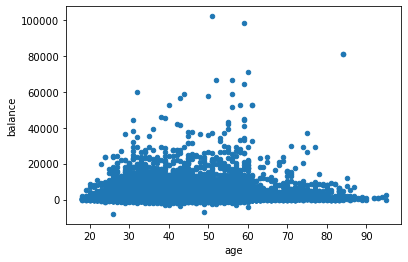

In [13]:
# Plot the scatter plot of balance and salary variables in data 
data.plot.scatter(x="salary", y="balance")
plt.show()

#Plot the scatter plot of balance and age variable in data 
data.plot.scatter(x="age", y="balance")
plt.show()

### Pair Plot 

Pair plot memungkinkan kita untuk melihat distribusi variable dan hubungannya dengan beberapa variabel lain. Pair plot adalah metode yang bagus untuk mengidentifikasi tren untuk analisis tindak lanjut dan, untungnya, sangat mudah dicoba menggunakan Python! Kita akan menggunakan library seaborn untuk membuat Pair Plots. Let's see. 

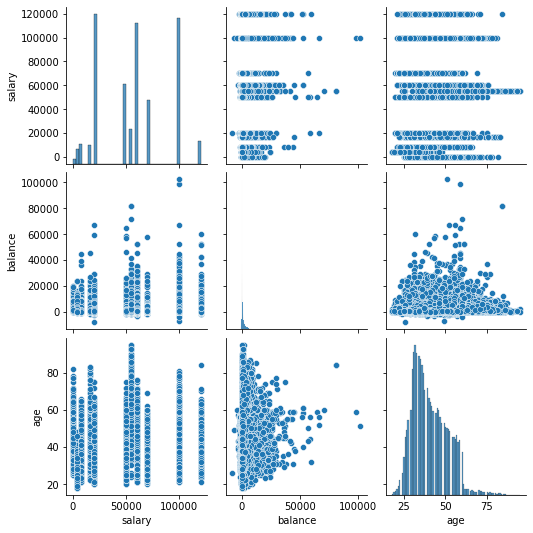

In [15]:
# Plot the pair plot of salary, balance, and age in dataframe . 
sns.pairplot(data = data, vars=['salary', 'balance', 'age'])
plt.show()

### Correlation Matrix 

Karena kita tidak dapat menggunakan lebih dari dua variabel sebagai sumbu x dan sumbu y di Scatter dan Pair Plots, sulit untuk melihat hubungan antara tiga variabel numerik dalam satu grafik. Oleh sebab itu, kita akan menggunakan matriks korelasi. Cool. 

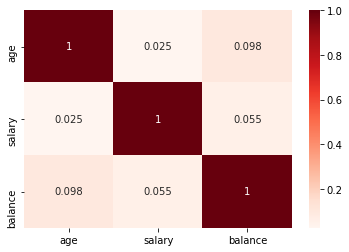

In [18]:
#Creating a matrix using age, salary, and balance as  rows and columns
data[['age', 'salary', 'balance']].corr()

# Plot the correlation matrix of salary, balance, and age in data dataframe.
sns.heatmap(data[['age', 'salary', 'balance']].corr(), annot=True, cmap = 'Reds')
plt.show()

# Thanks for Wocing 

In [21]:
!jupyter nbconvert --to html marketanalysis.ipynb

[NbConvertApp] Converting notebook marketanalysis.ipynb to html
[NbConvertApp] Writing 761621 bytes to marketanalysis.html
